In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
# df = pd.read_csv('/Users/racheldyap/Desktop/DataScienceFoundations/Session_3/2_titanic_dataset.csv')

In [3]:
def create_connection(database):
    try:
        conn = sqlite3.connect(database) # the connection object
        return conn 
    except Error as e:
        print(e)
    
    return None

In [15]:
database = '/Users/racheldyap/Desktop/DataScienceFoundations/Session_3/Titanic.db'
conn = create_connection(database)

query= 'SELECT * FROM passengers'
df=pd.read_sql_query(query,conn)
conn.close()
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,,1,2,W./C. 6607,23.45,,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,,Q


def create_connection(database):
    try:
        conn = sqlite3.connect(database) # the connection object
        return conn 
    except Error as e:
        print(e)
    
    return None

database = '/Users/racheldyap/Desktop/DataScienceFoundations/Session_3/Titanic.db'
conn = create_connection(database)

query= 'SELECT * FROM passengers'
df=pd.read_sql_query(query,conn)
conn.close()
df.tail()

In [16]:
# Clean 'Name' column by separating titles in a new column

In [17]:
# define a function get_title to extract titles from the Name

In [18]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\. ', name)
    if title_search:
        return title_search.group(1)
    return ""

# create a new column named 'Title' where you store the extracted titles (Mr., Mrs. etc
df['Title']=df['Name'].apply(get_title)

In [19]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

#### replacing data

In [20]:
df['Title']=df['Title'].replace('Mlle','Miss')
df['Title']=df['Title'].replace('Ms','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr
5,6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs


In [22]:
df["Age"] = pd.to_numeric(df["Age"])

In [23]:
df.loc[df['Age'] <= 16, 'NumericAge'] = 0 
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'NumericAge'] = 1 
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'NumericAge'] = 2 
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'NumericAge'] = 3 
df.loc[df['Age'] > 64, 'NumericAge'] = 4

#### mapping age range

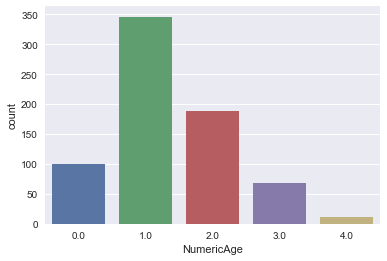

In [24]:
sns.countplot(df['NumericAge'])

In [25]:
df['CategoricalAge']=pd.cut(df['Age'],5)

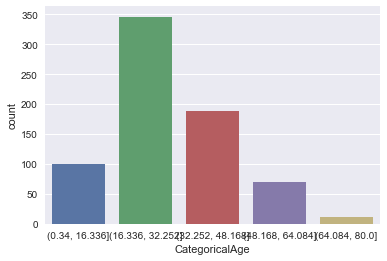

In [26]:
sns.countplot(df['CategoricalAge'])

In [27]:
df.CategoricalAge.head()

0    (16.336, 32.252]
1    (32.252, 48.168]
2    (16.336, 32.252]
3    (32.252, 48.168]
4    (32.252, 48.168]
Name: CategoricalAge, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [28]:
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

df['Person'] = df[['Age', 'Sex']].apply(get_person, axis=1)

In [29]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
title_mapping= {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

In [30]:
group = df[["Person","Survived"]].groupby(['Person'],as_index=False).mean()

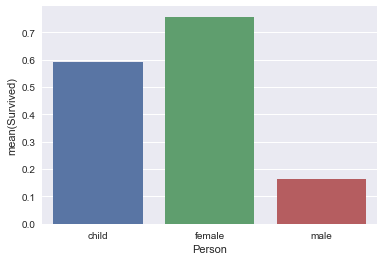

In [31]:
sns.barplot(x='Person', y='Survived', data=group)

In [2]:
df.groupby(df.index_col).agg({'Age':'mean','Survived':'sum'})[['Age','Survived']].reset_index()

NameError: name 'df' is not defined